In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [145]:
data = pd.read_csv("/content/creditcardnew.csv")

In [146]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [148]:
data.shape

(56962, 30)

In [149]:
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

In [150]:
X = data.iloc[:,:-1]

In [151]:
Y = data.iloc[:,-1]

In [152]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.042711,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,0.926255,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.408289,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,-0.199280,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.059880,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00


In [153]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [155]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [156]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


In [157]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
grid_values={'n_estimators':[50,70,100],'max_depth':[5,7,9]}
classifier=GridSearchCV(classifier,param_grid=grid_values,scoring='roc_auc',cv=5)

In [158]:
# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9], 'n_estimators': [50, 70, 100]},
             scoring='roc_auc')

In [159]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, train_preds)*100

99.96927735960851

In [161]:
accuracy_score(Y_test,test_preds)*100

99.92100412534012

In [162]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, train_preds)*100

91.02564102564102

In [163]:
roc_auc_score(Y_test,test_preds)*100

84.98681086784488

In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,train_preds)

array([[45491,     0],
       [   14,    64]])

In [165]:
confusion_matrix(Y_test,test_preds)

array([[11370,     3],
       [    6,    14]])

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [167]:
# Assuming you've defined your parameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [168]:
# Assuming 'X_train' and 'Y_train' are your training data and labels
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [169]:
# Accessing the best estimator
best_classifier = grid_search.best_estimator_

In [170]:
# Assuming 'X_train' is your training data
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

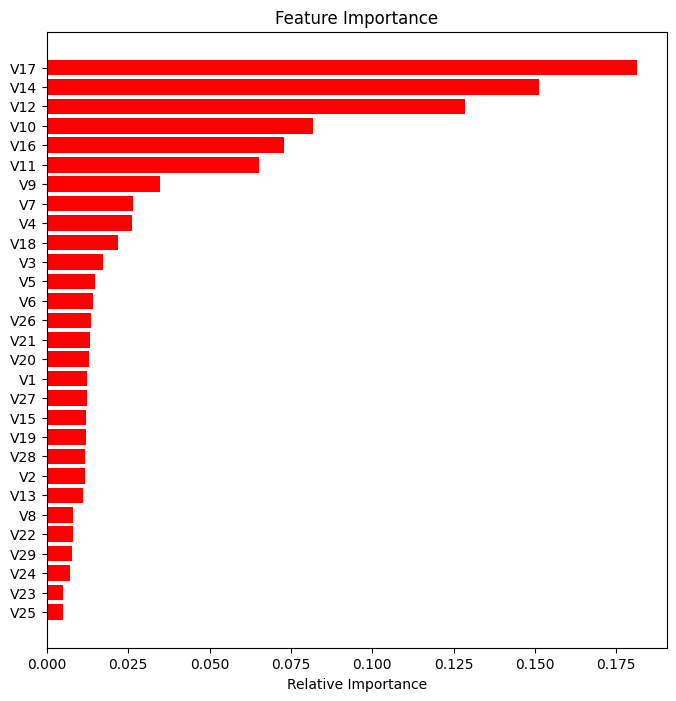

In [171]:
# Plotting feature importances
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()